In [1]:
#Code used to evaluate the potential of a solar power system at Lancaster University
#Author: Katie Roberts
#Date: 28/05/2021

In [57]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#read the building dimension data
floors=pd.read_csv('floor_volumes_1.csv')
#create a dataframe with only the buildings with roof surface area over zero
roofs= floors[floors['surface_area_roof']>0]
roofs.head(19)

,index,Unnamed: 0,scale,paper size,drawing title,building number,building name,name,area_air,perimeter,area_total,area_wall,volume_air,volume_wall,surface_area_wall,surface_area_roof,Unnamed: 16,Unnamed: 17
15,15,281,0.02,A1,A Floor,MC052,Bowland East,Bowland East MC052_0,281.20,79.023045,296.986065,15.786065,752.210000,131.323543,691.746432,7.288137,NaN,0.946845772
17,17,320,0.02,A1,C Floor,MC052,Bowland East,Bowland East MC052_2,254.60,78.027555,289.921117,35.321117,681.055000,181.460324,691.746432,178.764288,NaN,0.878169905
18,18,345,0.02,A1,D Floor,MC052,Bowland East,Bowland East MC052_3,88.10,60.581404,111.156829,23.056829,235.667500,95.024067,691.746432,111.156829,NaN,0.792573886
33,33,1090,0.01,A1,LG Floor,MC064,Bowland South,Bowland South MC064_0,487.90,153.631734,803.115211,315.215211,1363.192600,1121.645862,719.416290,25.039794,NaN,0.607509351
34,34,1104,0.01,A1,A Floor,MC064,Bowland South,Bowland South MC064_1,477.30,167.371974,778.075417,300.775417,1333.576200,1073.789140,719.416290,217.614650,NaN,0.613436679
36,36,1180,0.01,A1,C Floor,MC064,Bowland South,Bowland South MC064_3,476.60,188.276896,590.268204,113.668204,1331.620400,494.669423,719.416290,477.266792,NaN,0.807429567
37,37,1229,0.01,A1,D Floor,MC064,Bowland South,Bowland South MC064_4,129.60,52.868515,113.001412,0.000000,362.102400,33.900423,719.416290,113.001412,NaN,1.146888329
38,38,1244,0.02,A3,A Floor,MC062,Bowland Tower,Bowland Tower MC062_0,132.00,62.498558,135.918309,3.918309,313.280000,50.074946,621.602957,56.090629,NaN,0.971171588
43,43,1303,0.02,A3,O Floor,MC062,Bowland Tower,Bowland Tower MC062_13,104.50,57.126734,154.830250,50.330250,248.013333,165.899535,621.602957,152.359727,NaN,0.674932708
46,46,1329,0.02,A3,D Floor,MC062,Bowland Tower,Bowland Tower MC062_3,93.00,57.126734,154.830250,61.830250,220.720000,193.192869,621.602957,0.019772,NaN,0.600657817


In [58]:
#read the weather data
weather=pd.read_csv('weatherall.csv')

C:\Users\katie\anaconda3\envs\my_environment\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (2,9,10,11,16,17,18,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,50,55,56,57,58,68,70,72,74,76,81,82,86,100,101,133,134,145,146,163,164,165,178) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [59]:
#choose only the timestamp and average GHI from the weather dataframe
GHI=weather[['TIMESTAMP','Slr_kW_Avg']]

In [60]:
#create a year and date column in the weather dataframe
GHI['year']=GHI['TIMESTAMP'].apply(lambda x:pd.Timestamp(x).strftime('%Y'))
GHI['date']=GHI['TIMESTAMP'].apply(lambda x:pd.Timestamp(x).strftime('%Y-%m-%d'))

<ipython-input-60-cc7b2bb4ba62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GHI['year']=GHI['TIMESTAMP'].apply(lambda x:pd.Timestamp(x).strftime('%Y'))
<ipython-input-60-cc7b2bb4ba62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GHI['date']=GHI['TIMESTAMP'].apply(lambda x:pd.Timestamp(x).strftime('%Y-%m-%d'))


In [61]:
#use solar irradiance data from an online source to check that the GHI values are around the right values
online=pd.read_csv('onlinesolar.csv')#read the online solar data
online['date']=online['DateAllHours'].apply(lambda x:pd.Timestamp(x).strftime('%Y-%m-%d'))#create a date column
online['G0' ]=online['G0' ].astype(float)#change the irradiance to a float data type
online_dates=online.groupby(['date'])['G0' ].mean() #find the mean irradiance at each date
online_dates=online_dates.reset_index()
GHI['Slr_kW_Avg' ]=GHI['Slr_kW_Avg' ].astype(float) #change the irradiance to a float data type
GHI_dates=GHI.groupby(['date'])['Slr_kW_Avg' ].mean()#find the mean irradiance at each date
GHI_dates=GHI_dates.reset_index()
online_hazel=pd.merge(online_dates, GHI_dates, how='inner', left_on='date', right_on='date')#merge the online source data and weather station data
online_hazel['G0(kW)']=online_hazel['G0']/1000 #change the online irradiance to the same order of magnitude as the weather station irradiance

<ipython-input-61-080a9a5231de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GHI['Slr_kW_Avg' ]=GHI['Slr_kW_Avg' ].astype(float) #change the irradiance to a float data type


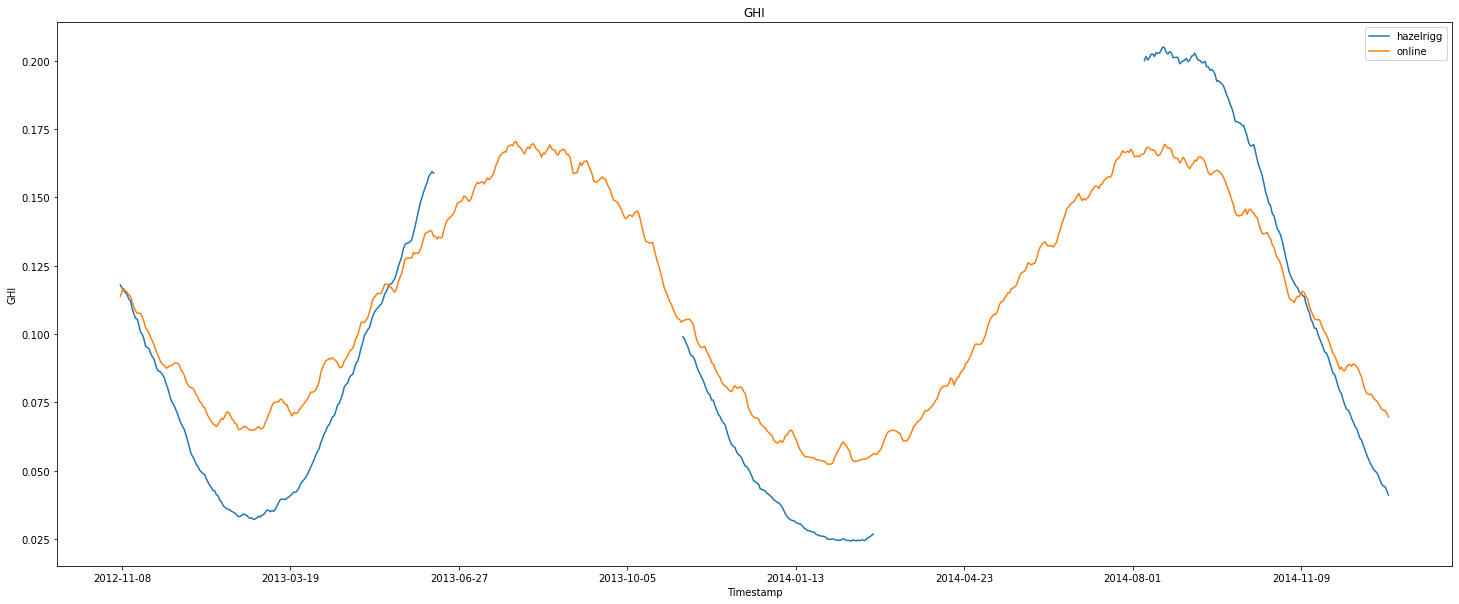

In [62]:
#plot the rolling averages of the irradiance from the weather station and online source
online_hazel[ 'GHI_rolling_avg' ] = online_hazel['Slr_kW_Avg'].rolling(100).mean()
online_hazel[ 'G0_rolling_avg' ] = online_hazel['G0(kW)'].rolling(100).mean()
fig=plt.figure(figsize=(25, 10))
ax = fig.add_subplot()
ax.set_xticks([0, 100, 200,  300,400, 500,600, 700,800, 900])
plt.plot(online_hazel['date'], online_hazel['GHI_rolling_avg'])
plt.plot(online_hazel['date'], online_hazel['G0_rolling_avg'])
plt.xlabel('Timestamp')
plt.ylabel('GHI')
plt.title('GHI')
plt.legend(['hazelrigg', 'online'])

In [68]:
#create dataframes of the irradiance in each seperate year
GHI18=GHI[GHI['year']=='2018']
GHI19=GHI[GHI['year']=='2019']
GHI20=GHI[GHI['year']=='2020']
#sort the values in acsending order of time
GHI18=GHI18.sort_values(by='TIMESTAMP')
GHI19=GHI19.sort_values(by='TIMESTAMP')
GHI20=GHI20.sort_values(by='TIMESTAMP')
GHI20.head()

,TIMESTAMP,Slr_kW_Avg,year,date


In [69]:
#find the number of missing values in each year
print('Missing values in 2018 dataset is',GHI18['Slr_kW_Avg'].isna().sum())
print('Missing values in 2019 dataset is',GHI19['Slr_kW_Avg'].isna().sum())
print('Missing values in 2020 dataset is',GHI20['Slr_kW_Avg'].isna().sum())
#find the number of unique datapoints (for readings taken at 10 minute intervals in a 365 day year there should be 52560 data points)
print('The number of unique datapoints in 2018 is',GHI18.TIMESTAMP.nunique())
print('The number of unique datapoints in 2019 is',GHI19.TIMESTAMP.nunique())
print('The number of unique datapoints in 2020 is',GHI20.TIMESTAMP.nunique())

Missing values in 2018 dataset is 0
Missing values in 2019 dataset is 1796
Missing values in 2020 dataset is 0
The number of unique datapoints in 2018 is 52560
The number of unique datapoints in 2019 is 22899
The number of unique datapoints in 2020 is 0


In [70]:
#use the 2018 data from this point on
#change the irradiance value to a float
GHI18['Slr_kW_Avg' ]=GHI18['Slr_kW_Avg' ].astype(float)
GHI_dates=GHI18.groupby(['date'])['Slr_kW_Avg' ].mean()#find the mean irradiance at each unique date
GHI_dates=GHI_dates.reset_index()


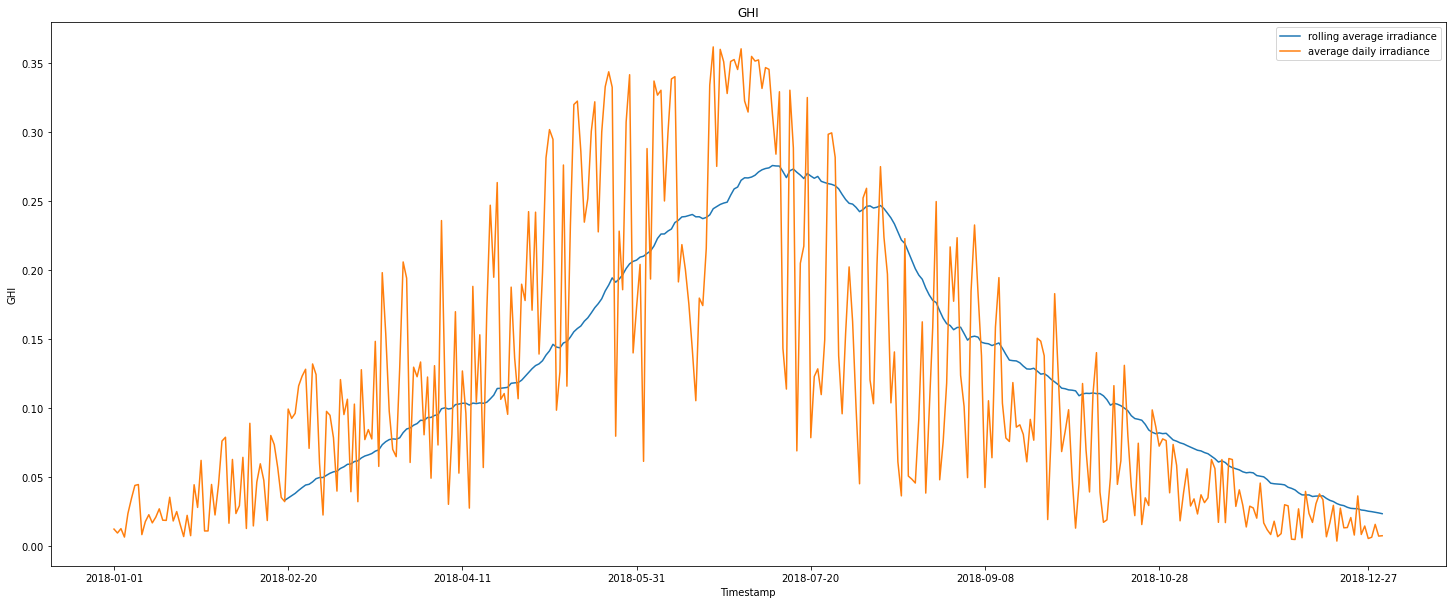

In [77]:
#plot the average daily irradiance over the year
GHI_dates[ 'GHI_rolling_avg' ] = GHI_dates['Slr_kW_Avg'].rolling(50).mean()
fig=plt.figure(figsize=(25, 10))
ax = fig.add_subplot()
ax.set_xticks([0,50, 100, 150, 200, 250, 300,360])
plt.plot(GHI_dates['date'], GHI_dates['GHI_rolling_avg'])
plt.plot(GHI_dates['date'], GHI_dates['Slr_kW_Avg' ])

plt.xlabel('Timestamp')
plt.ylabel('GHI')
plt.title('GHI')
plt.legend(['rolling average irradiance', 'average daily irradiance'])

In [78]:
#calculate the power from the irradiance and solar panel efficiencies 
GHI18['Power']=GHI18['Slr_kW_Avg']*0.16*900*0.6

In [79]:
#calculate the energy generated at each 10 minute interval
GHI18['Energy']=GHI18['Power']*(1/6)

In [82]:
#calculate the total energy generated in 2018
print('The total potential energy generation in 2018 is',GHI18['Energy'].sum(), 'kWh')

The total potential energy generation in 2018 is 91057.33439999998 kWh


In [83]:
#find the maximum power 
print('The maximum potential power in 2018 is',GHI18['Power'].max(), 'kW')

The maximum potential power in 2018 is 99.8784 kW


Text(0.5, 1.0, 'Potential energy generation by solar power in 2018')

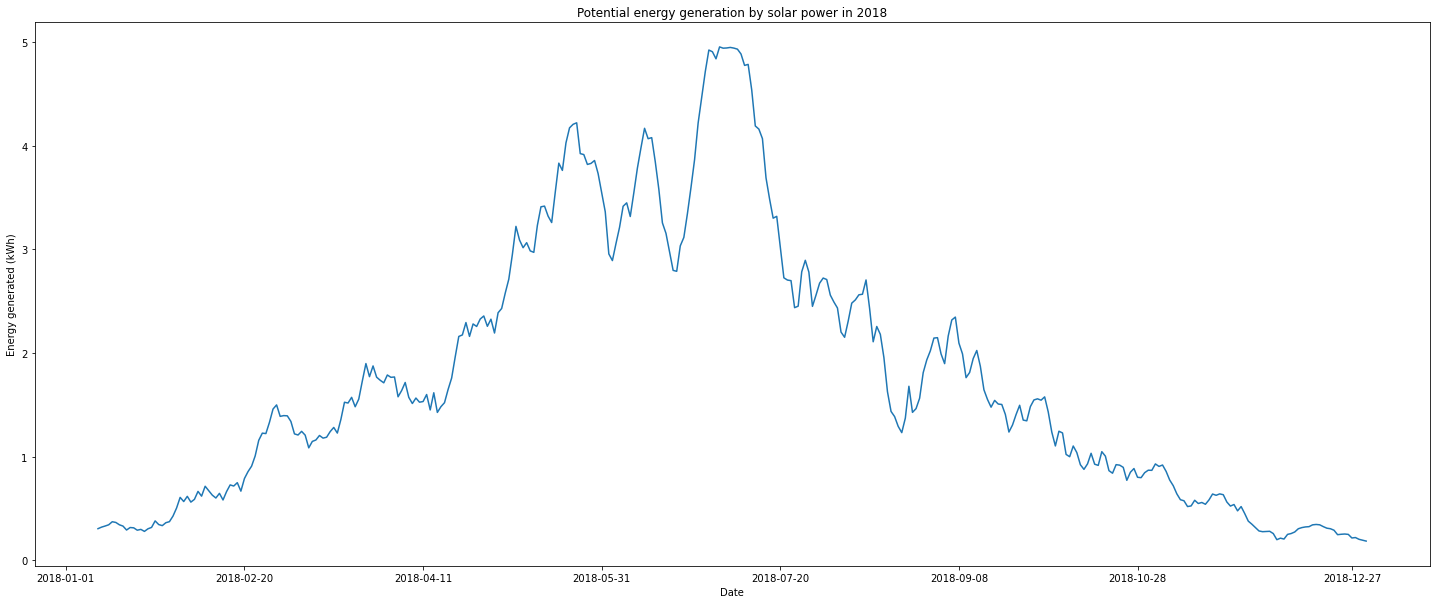

In [85]:
#plot the potential energy generated over the year
GHI18_dates=GHI18.groupby(['date'])[['Slr_kW_Avg','Energy' ]].mean()#find the mean irradiance and energy generated at each date
GHI18_dates=GHI18_dates.reset_index()
#find the rolling average of the energy over the year
GHI18_dates[ 'energy_rolling_avg' ] = GHI18_dates['Energy'].rolling(10).mean()
fig=plt.figure(figsize=(25, 10))
ax = fig.add_subplot()
ax.set_xticks([0,50, 100, 150, 200, 250, 300,360])
plt.plot(GHI18_dates['date'], GHI18_dates['energy_rolling_avg'])

plt.xlabel('Date')
plt.ylabel('Energy generated (kWh)')
plt.title('Potential energy generation by solar power in 2018')

In [86]:
#estimate the savings using online wholesale electricity prices
# create a complete list of dates starting at 2017-07-27 00:00:00 and ending at 2020-11-28 23:57:00 with one month intervals
rng2 = pd.date_range('2017-07-01', '2020-12-01', freq='M') 
dates2 = pd.DataFrame({'Date': rng2}) #create a data frame from the above list
dates2.Date=pd.to_datetime(dates2.Date) #ensure that the date column is datetime data type
import datetime
from datetime import datetime
dates2['first_day']=dates2.Date.apply(lambda x:pd.Timestamp(x).strftime('%Y-%m-01'))
prices=[43.05, 43.34, 47.17, 46.68, 51.45, 56.18, 50.84, 53.68, 56.79, 50.74, 54.25, 54, 57.61, 61.94, 67.69, 64.76, 
       62.19, 64.32, 62.55, 50.27, 44.96, 43.87, 41.35, 39.40, 41.86, 39.62, 37.32, 37.74, 46.04, 39.94, 35.93, 
       32.04, 33.22, 24.01, 24.13, 28.42, 31.28, 37.88, 45.3, 44.65, 46.83] #create a list of the wholesale prices
dates2['price']=prices
dates2=dates2[[ 'first_day', 'price']]
GHI18['first_date']=GHI18.date.apply(lambda x:pd.Timestamp(x).strftime('%Y-%m-01'))
solar_and_prices=pd.merge(GHI18, dates2, how='left', left_on='first_date', right_on='first_day')
solar_and_prices['saving']=(solar_and_prices['Energy']/1000)*solar_and_prices['price'] #calculate the savings

In [87]:
#calculate the total potential savings in 2018
print('The total potential savings from solar power in 2018 is £',solar_and_prices.saving.sum())

The total potential savings from solar power in 2018 is £ 5201.048009807999


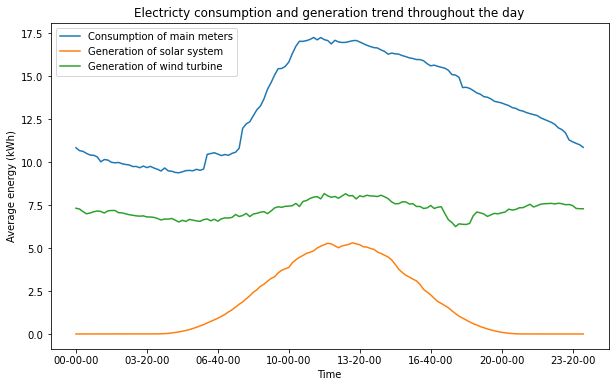

In [89]:
#plot the energy consumption, wind energy generation and solar energy generation
wind_times=pd.read_csv('wind_times.csv')#read the wind turbine dataframe
consumption=pd.read_csv('main_meters_avg.csv')#read the main electricty meters electricity consumption data

#create a dataframe of the average consumption at each unique time in 2018
consumption['date']=consumption['timestamp'].apply(lambda x:pd.Timestamp(x).strftime('%Y-%m-%d'))
consumption['time']=consumption['timestamp'].apply(lambda x:pd.Timestamp(x).strftime('%H-%M-%S'))
consumption['year']=consumption['timestamp'].apply(lambda x:pd.Timestamp(x).strftime('%Y'))
consumption18=consumption[consumption['year']=='2018']
consumption_dates=consumption18.groupby(['time'])['reading' ].mean() 
consumption_dates=consumption_dates.reset_index()

#create a dataframe of the potential energy generated at each unique time
GHI18['time']=GHI18['TIMESTAMP'].apply(lambda x:pd.Timestamp(x).strftime('%H-%M-%S'))
GHI18_times=GHI18.groupby(['time'])['Energy'].mean()
GHI18_times=GHI18_times.reset_index()

#create the plot
fig=plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
ax.set_xticks([0, 20,  40,  60, 80, 100,  120, 140,  160])
plt.plot(consumption_dates['time'], consumption_dates['reading'])
plt.plot(wind_solar['time'], wind_solar['Energy'])
plt.plot(wind_solar.time, (wind_solar['Energy generated (kWh)']))
plt.xlabel('Time')
plt.ylabel('Average energy (kWh)')
plt.title('Electricty consumption and generation trend throughout the day')
plt.legend(['Consumption of main meters', 'Generation of solar system', 'Generation of wind turbine'],loc='upper left')